<a href="https://colab.research.google.com/github/diogojorgebasso/grafos/blob/main/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Código para o Trabalho de Grafos. </h1>
<hr>
Por Diogo Jorge Basso <br>
Matrícula: 2022003577 <br>
Universidade Federal de Itajubá <br>


## Primeira parte
Nesta parte contemplaremos somente o "business side" (lado de negócio) do nosso código. Ou seja, é a parte da solução do problema, da implementação ad hoc do código.

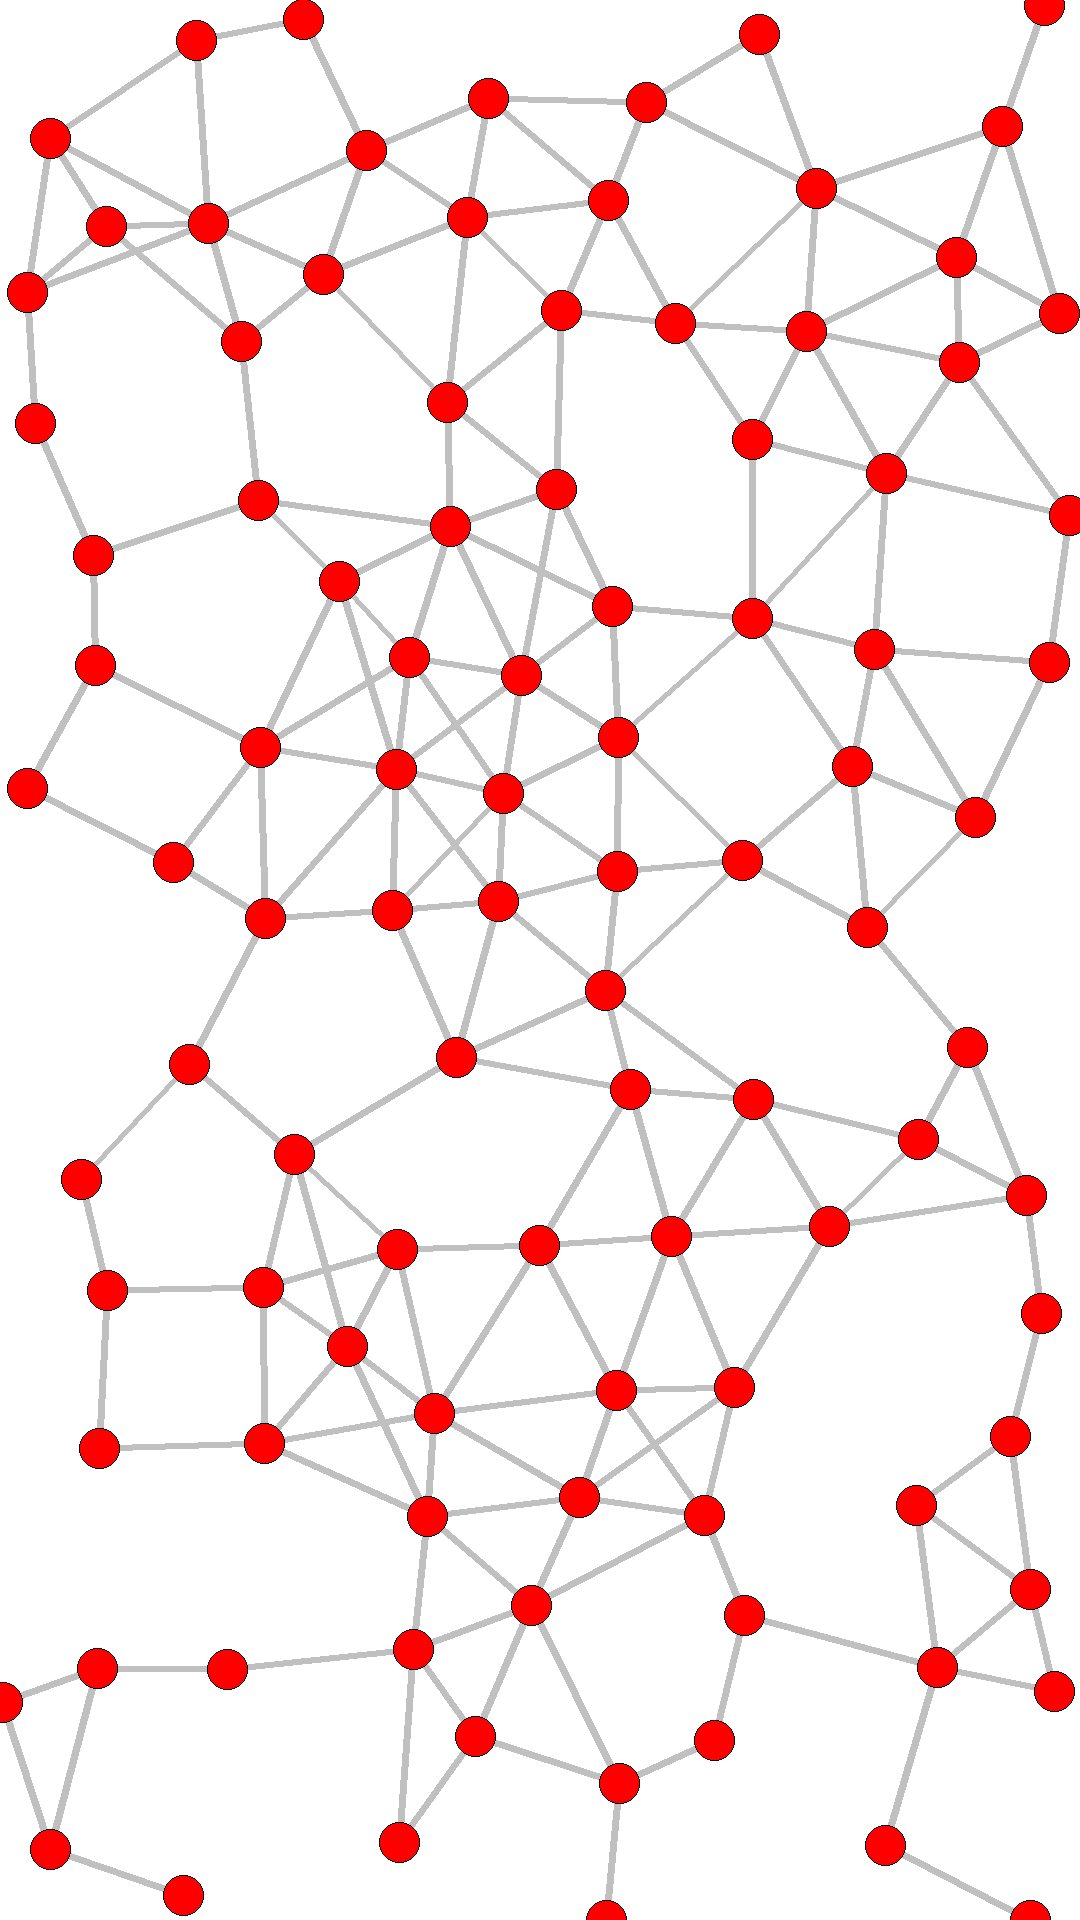

In [ ]:
import random
from math import sqrt
from PIL import Image, ImageDraw

h = 1920
w = 1080

vertices = []
arestas = []

def calcular_distancia(x1, y1, x2, y2):
    return sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def distancia_minima(x, y):
    for v in vertices:
        if calcular_distancia(x, y, v[0], v[1]) < 100:
            return False
    return True

while len(vertices) < 100:
    x = random.randint(0, w)
    y = random.randint(0, h)
    if distancia_minima(x, y):
        vertices.append((x, y))

for i in range(len(vertices)):
    for j in range(len(vertices)):
        if i != j:
            distancia = calcular_distancia(vertices[i][0], vertices[i][1], vertices[j][0], vertices[j][1])
            if distancia < 200:
                arestas.append((i, j, distancia))

raio = 20
cor_linha = (192, 192, 192)  # cinza
largura_linha = 6

image = Image.new("RGB", (w, h), color="white")
draw = ImageDraw.Draw(image)

for edge in arestas:
    i, j, _ = edge
    x1, y1 = vertices[i]
    x2, y2 = vertices[j]
    draw.line([(x1, y1), (x2, y2)], fill=cor_linha, width=largura_linha)

for vertex in vertices:
    x, y = vertex
    draw.ellipse([(x - raio, y - raio), (x + raio, y + raio)], fill="red", outline="black")

image.show()

## Adição do vídeo

Nesta seção exploraremos 

In [ ]:
import random
from math import sqrt
import cv2
import numpy as np

h = 1080
w = 1920

vertices = []
arestas = []

def calcular_distancia(x1, y1, x2, y2):
    return sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def distancia_minima(x, y):
    for v in vertices:
        if calcular_distancia(x, y, v[0], v[1]) < 100:
            return False
    return True

while len(vertices) < 100:
    x = random.randint(0, w)
    y = random.randint(0, h)
    if distancia_minima(x, y):
        vertices.append((x, y))

for i in range(len(vertices)):
    for j in range(len(vertices)):
        if i != j:
            distancia = calcular_distancia(vertices[i][0], vertices[i][1], vertices[j][0], vertices[j][1])
            if distancia < 200:
                arestas.append((i, j, distancia))

raio = 20
cor_linha = (192, 192, 192)  # cinza
largura_linha = 6

# Criar vídeo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('diogo.mp4', fourcc, 30, (w, h))

# Criar imagens do grafo em cada frame do vídeo
for frame in range(len(arestas) + 1):
    image = np.zeros((h, w, 3), dtype=np.uint8)

    for i in range(frame):
        edge = arestas[i]
        j = edge[1]
        x1, y1 = vertices[edge[0]]
        x2, y2 = vertices[j]
        cv2.line(image, (x1, y1), (x2, y2), cor_linha, largura_linha)

    for vertex in vertices:
        x, y = vertex
        cv2.circle(image, (x, y), raio, (0, 0, 255), -1)

    out.write(image)

# desmonta o observer
out.release()

# Adicionando áudio

Conforme requerido pelo trabalho, façamos a utilização do som no vídeo.
Utilizaremos a blbioteca
>ffmpeg-python

para tal.



In [ ]:
pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ffmpeg

input_audio = ffmpeg.input('soft-music.mp3')
input_video = ffmpeg.input('diogo.mp4')

(
    ffmpeg
    .filter(input_audio, 'join', inputs=1, channel_layout='mono')
    .output(input_video.video, 'diogo-com-audio.mp4', shortest=None, vcodec='copy')
    .overwrite_output()
    .run()
)

(None, None)